In [7]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

enc = OneHotEncoder(handle_unknown='ignore',sparse=False)
labels = enc.fit_transform(labels.reshape(labels.shape[0],1) )
# X = scaler.transform(data)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0, stratify=labels)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1437, 64) (360, 64) (1437, 10) (360, 10)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, concatenate
from tensorflow.keras.models import Model

2023-04-10 09:53:58.212500: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-10 09:53:59.248802: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-04-10 09:53:59.248897: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/loca

In [26]:
model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=10, activation='softmax')
])

In [18]:
from tensorflow.keras.losses import CategoricalCrossentropy

In [27]:
model.compile(loss=CategoricalCrossentropy())
model.fit(X_train, y_train, batch_size=20, epochs=10)

Epoch 1/10
72/72 [==============================] - 1s 2ms/step - loss: 1.9796
Epoch 2/10
72/72 [==============================] - 0s 2ms/step - loss: 1.3017
Epoch 3/10
72/72 [==============================] - 0s 2ms/step - loss: 0.8575
Epoch 4/10
72/72 [==============================] - 0s 2ms/step - loss: 0.5811
Epoch 5/10
72/72 [==============================] - 0s 2ms/step - loss: 0.4091
Epoch 6/10
72/72 [==============================] - 0s 2ms/step - loss: 0.3028
Epoch 7/10
72/72 [==============================] - 0s 2ms/step - loss: 0.2331
Epoch 8/10
72/72 [==============================] - 0s 2ms/step - loss: 0.1857
Epoch 9/10
72/72 [==============================] - 0s 2ms/step - loss: 0.1526
Epoch 10/10
72/72 [==============================] - 0s 2ms/step - loss: 0.1254


In [28]:
model.predict(X_test,)

12/12 [==============================] - 0s 1ms/step


array([[0.4716542 , 0.5456451 , 0.38670966, ..., 0.6715771 , 0.49506453,
        0.03549017],
       [0.37434798, 0.5435892 , 0.35588995, ..., 0.22471304, 0.824395  ,
        0.99692243],
       [0.30191714, 0.58843106, 0.26564276, ..., 0.2392191 , 0.17644875,
        0.6468081 ],
       ...,
       [0.34760296, 0.85963005, 0.99870396, ..., 0.34278375, 0.3909495 ,
        0.1982011 ],
       [0.24925312, 0.89489186, 0.99904996, ..., 0.20015739, 0.44249323,
        0.21522677],
       [0.04138259, 0.9155792 , 0.16950019, ..., 0.27055612, 0.9921638 ,
        0.8869316 ]], dtype=float32)

In [29]:
y_pred = np.argmax(model.predict(X_test,), axis=1)

12/12 [==============================] - 0s 1ms/step


In [30]:
y_pred

array([6, 9, 3, 2, 4, 7, 6, 4, 1, 0, 8, 8, 1, 9, 6, 6, 1, 7, 0, 0, 1, 6,
       1, 0, 6, 8, 2, 0, 7, 4, 5, 4, 7, 2, 8, 7, 4, 9, 3, 2, 6, 9, 7, 1,
       0, 1, 3, 5, 7, 9, 5, 2, 0, 9, 4, 3, 8, 6, 3, 2, 0, 5, 0, 6, 6, 7,
       9, 6, 3, 2, 6, 0, 2, 2, 4, 0, 5, 1, 9, 7, 1, 0, 7, 1, 1, 1, 7, 0,
       4, 5, 4, 1, 5, 8, 5, 4, 9, 1, 2, 4, 4, 9, 8, 7, 6, 3, 2, 5, 1, 0,
       7, 3, 4, 5, 7, 8, 0, 3, 8, 0, 8, 8, 1, 6, 2, 3, 0, 3, 4, 9, 9, 2,
       8, 3, 5, 0, 1, 4, 0, 1, 6, 9, 0, 6, 5, 8, 3, 9, 3, 9, 7, 2, 5, 6,
       6, 4, 9, 4, 3, 1, 9, 6, 0, 7, 8, 7, 4, 4, 7, 9, 3, 4, 8, 9, 0, 6,
       8, 6, 3, 1, 1, 5, 7, 6, 3, 2, 5, 4, 5, 3, 1, 3, 8, 5, 4, 8, 1, 1,
       5, 0, 6, 2, 2, 5, 8, 3, 5, 8, 6, 3, 2, 9, 0, 4, 2, 1, 1, 2, 2, 3,
       4, 4, 3, 5, 3, 8, 0, 4, 8, 5, 8, 3, 7, 9, 4, 1, 2, 1, 9, 3, 2, 9,
       7, 0, 7, 8, 9, 8, 4, 2, 2, 7, 2, 1, 1, 7, 7, 3, 9, 5, 5, 8, 5, 0,
       0, 5, 2, 9, 6, 4, 6, 3, 7, 2, 0, 7, 7, 0, 6, 5, 1, 2, 3, 1, 6, 7,
       5, 5, 2, 9, 3, 2, 3, 7, 0, 7, 2, 1, 8, 5, 4,

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_pred, enc.inverse_transform(y_test))

0.9555555555555556

In [40]:
inp = Input(shape=X_train.shape[1], name='Input_Layer')
layer1 = Dense(units=25, activation='relu', name='First_Layer')(inp)
layer21 = Dense(units=15, activation='relu', name='21_Layer')(layer1)
layer22 = Dense(units=15, activation='relu', name='22_Layer')(layer1)
layer2 = concatenate([layer21, layer22])
output_layer = Dense(units=10, activation='softmax', name='Output_Layer')(layer2)

In [41]:
model = Model(inputs=[inp], outputs=[output_layer])
model.compile(
    loss=CategoricalCrossentropy()
)

In [42]:
model.fit(X_train, y_train, batch_size=20, epochs=10)

Epoch 1/10
72/72 [==============================] - 1s 3ms/step - loss: 1.9550
Epoch 2/10
72/72 [==============================] - 0s 2ms/step - loss: 1.1666
Epoch 3/10
72/72 [==============================] - 0s 3ms/step - loss: 0.6133
Epoch 4/10
72/72 [==============================] - 0s 3ms/step - loss: 0.3568
Epoch 5/10
72/72 [==============================] - 0s 2ms/step - loss: 0.2461
Epoch 6/10
72/72 [==============================] - 0s 3ms/step - loss: 0.1851
Epoch 7/10
72/72 [==============================] - 0s 2ms/step - loss: 0.1446
Epoch 8/10
72/72 [==============================] - 0s 2ms/step - loss: 0.1173
Epoch 9/10
72/72 [==============================] - 0s 2ms/step - loss: 0.0958
Epoch 10/10
72/72 [==============================] - 0s 2ms/step - loss: 0.0793


In [43]:
y_pred = np.argmax(model.predict(X_test,), axis=1)
accuracy_score(y_pred, enc.inverse_transform(y_test))

12/12 [==============================] - 0s 1ms/step


0.9611111111111111

In [33]:
from tensorflow.keras.utils import plot_model

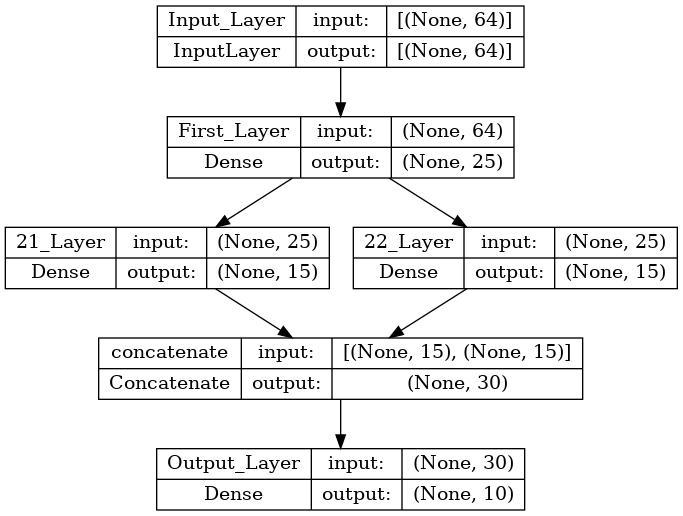

In [44]:
plot_model(model, to_file="test.png", show_shapes=True)

In [45]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Layer (InputLayer)       [(None, 64)]         0           []                               
                                                                                                  
 First_Layer (Dense)            (None, 25)           1625        ['Input_Layer[0][0]']            
                                                                                                  
 21_Layer (Dense)               (None, 15)           390         ['First_Layer[0][0]']            
                                                                                                  
 22_Layer (Dense)               (None, 15)           390         ['First_Layer[0][0]']            
                                                                                            